In [1]:
pip install eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107717 sha256=f1bde6ffd749d16dfb612c5f1704399e85c6a213e518a1fe2707181c6cc8f39e
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score, ConfusionMatrixDisplay, RocCurveDisplay
from eli5.sklearn import PermutationImportance
from eli5 import show_weights

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.inspection import PartialDependenceDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from xgboost import XGBClassifier

import joblib

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv') #upload the dataset on the drive, mount drive, copy path of dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


<Axes: >

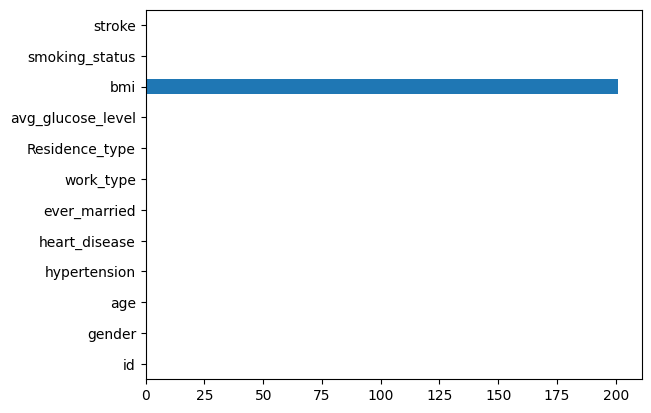

In [5]:
# Printing the number of N/A values in eacg column
print(df.isna().sum())
# Graphical representation of the na values present in the attribute - bar graph
df.isna().sum().plot.barh()

In [6]:
# To check the  statistical analysis of all numerical type attributes  (count, mean, standaard deviation, minimum values, all quartiles, maximum values)
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
# Provides the data type of all attributes and the number of NOT NULL values count is obtained
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Converting numeric-binary value attributes to string
# df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# Generating dummy attributes - one hot encoding format
missing_values = df[['age', 'avg_glucose_level', 'bmi']].isnull().sum()

# If there are missing values, you need to handle them (e.g., by filling with a specific value)
if missing_values.any():
    # Fill missing values with a specific value (you can choose a different strategy based on your data)
    df[['age', 'avg_glucose_level', 'bmi']] = df[['age', 'avg_glucose_level', 'bmi']].fillna(0)
df = pd.get_dummies(df, drop_first= True)
df['age'] = df['age'].astype(int)
df['avg_glucose_level'] = df['avg_glucose_level'].astype(int)
df['bmi'] = df['bmi'].astype(int)

In [9]:
# The data frame after performing dummy attributes
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67,0,1,228,36,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61,0,0,202,0,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80,0,1,105,32,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49,0,0,171,34,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79,1,0,174,24,1,0,0,1,0,0,1,0,0,0,1,0


Text(0.5, 1.0, 'Stroke in people before SMOTE')

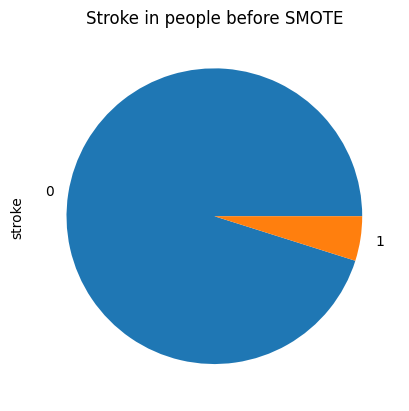

In [10]:
df['stroke'].value_counts().plot(kind="pie")
plt.title('Stroke in people before SMOTE')

<Axes: title={'center': 'Stroke in people after SMOTE'}, ylabel='stroke'>

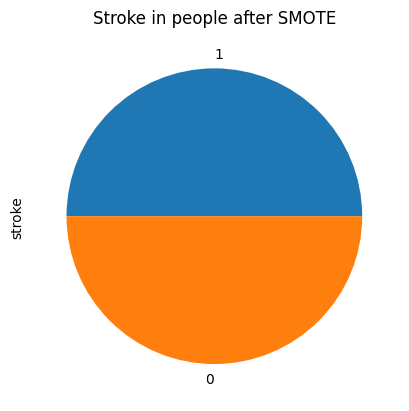

In [11]:
# Since our Dataset is highly undersampled (based on target instances) we are going to perform a over sampling method to have equal representation of both the target classes
# Using random oversampling - importing the library
from imblearn.over_sampling import RandomOverSampler

# Performing a minority oversampling
oversample = RandomOverSampler(sampling_strategy='minority')
X=df.drop(['stroke'],axis=1)
y=df['stroke']

# Obtaining the oversampled dataframes - testing and training
X_over, y_over = oversample.fit_resample(X, y)

plt.title('Stroke in people after SMOTE')
pd.Series(y_over).value_counts().plot(kind="pie")

In [12]:
# Converting numeric-binary value attributes to string
# df[['hypertension', 'heart_disease', 'stroke']] = df[['hypertension', 'heart_disease', 'stroke']].astype(str)
# # Generating dummy attributes - one hot encoding format
# df = pd.get_dummies(df, drop_first= True)


In [13]:
X_over = X_over.drop(['id'],axis=1)
X_over.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,0,1,228,36,1,0,1,0,1,0,0,1,1,0,0
1,61,0,0,202,0,0,0,1,0,0,1,0,0,0,1,0
2,80,0,1,105,32,1,0,1,0,1,0,0,0,0,1,0
3,49,0,0,171,34,0,0,1,0,1,0,0,1,0,0,1
4,79,1,0,174,24,0,0,1,0,0,1,0,0,0,1,0


In [144]:
standard_scalar=StandardScaler()
normalized_data=standard_scalar.fit_transform(X_over)

In [145]:
x_train,x_test,y_train,y_test=train_test_split(normalized_data,y_over,shuffle=True)

In [146]:
mlp_cls=Sequential([
    Dense(units=512,activation='relu',input_dim=x_train.shape[1]),
    Dropout(0.1),
    Dense(units=256,activation='relu'),
    Dropout(0.1),
    Dense(units=128,activation='relu'),
    Dropout(0.1),
    Dense(units=64,activation='relu'),
    Dropout(0.1),
    Dense(units=1,activation='sigmoid')
])

In [147]:
mlp_cls.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 512)               8704      
                                                                 
 dropout_16 (Dropout)        (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_22 (Dense)            (None, 128)               32896     
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_23 (Dense)            (None, 64)               

In [212]:
x2_train, x2_val, y2_train, y2_val = train_test_split(x_train, y_train, test_size=0.2, shuffle=True)
erl_stpg=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [149]:
mlp_cls.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mlp_cls.fit(x2_train,y2_train,epochs=100,batch_size=256,validation_data=(x2_val,y2_val),callbacks=[erl_stpg])

Epoch 1/100
23/23 [==============================] - 2s 26ms/step - loss: 0.5312 - accuracy: 0.7466 - val_loss: 0.4690 - val_accuracy: 0.7882
Epoch 2/100
23/23 [==============================] - 0s 18ms/step - loss: 0.4515 - accuracy: 0.7934 - val_loss: 0.4296 - val_accuracy: 0.8060
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 0.4183 - accuracy: 0.8136 - val_loss: 0.3962 - val_accuracy: 0.8108
Epoch 4/100
23/23 [==============================] - 0s 16ms/step - loss: 0.3998 - accuracy: 0.8165 - val_loss: 0.3798 - val_accuracy: 0.8348
Epoch 5/100
23/23 [==============================] - 1s 26ms/step - loss: 0.3574 - accuracy: 0.8400 - val_loss: 0.3512 - val_accuracy: 0.8444
Epoch 6/100
23/23 [==============================] - 1s 27ms/step - loss: 0.3346 - accuracy: 0.8580 - val_loss: 0.3207 - val_accuracy: 0.8677
Epoch 7/100
23/23 [==============================] - 1s 26ms/step - loss: 0.3191 - accuracy: 0.8603 - val_loss: 0.3068 - val_accuracy: 0.8821
Epoch 

In [154]:
xgb_cls=XGBClassifier()

xgb_prm_grd = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

xgb_grd_srch = GridSearchCV(estimator=xgb_cls, param_grid=xgb_prm_grd, scoring='neg_log_loss', cv=5)
xgb_grd_srch.fit(x_train, y_train)

xgb_bst_prms = xgb_grd_srch.best_params_
print("Best Hyperparameters:", xgb_bst_prms)
xgb_cls_bst=xgb_grd_srch.best_estimator_

Best Hyperparameters: {'max_depth': 7, 'n_estimators': 200}


In [151]:
logistic_regression_classifer=LogisticRegression()
logistic_regression_classifer.fit(x_train,y_train)

LogisticRegression()

In [155]:
knn_classifier=KNeighborsClassifier()

knn_classifier_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn_classifier_grid_search = GridSearchCV(estimator=knn_classifier, param_grid=knn_classifier_param_grid, scoring='neg_log_loss', cv=5)
knn_classifier_grid_search.fit(x_train,y_train)

knn_classifier_best_params = knn_classifier_grid_search.best_params_
print("Best Hyperparameters:", knn_classifier_best_params)
knn_classifier_best=knn_classifier_grid_search.best_estimator_

Best Hyperparameters: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}


In [105]:
decision_tree_classifer=DecisionTreeClassifier()

decision_tree_param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

decision_tree_grid_search = GridSearchCV(estimator=decision_tree_classifer, param_grid=decision_tree_param_grid, scoring='neg_log_loss', cv=5)
decision_tree_grid_search.fit(x_train,y_train)

decision_tree_best_params = decision_tree_grid_search.best_params_
print("Best Hyperparameters:", decision_tree_best_params)
decision_tree_classifier_best=decision_tree_grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5}


In [103]:
random_forest_classifer=RandomForestClassifier()

random_forest_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

random_forest_grid_search = GridSearchCV(estimator=random_forest_classifer, param_grid=random_forest_param_grid, scoring='neg_log_loss', cv=5)
random_forest_grid_search.fit(x_train,y_train)

random_forest_best_params = random_forest_grid_search.best_params_
print("Best Hyperparameters:", random_forest_best_params)

Best Hyperparameters: {'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [156]:
random_forest_classifier_best=random_forest_grid_search.best_estimator_

In [158]:
mlp_prd=mlp_cls.predict(x_test)
mlp_prd=mlp_prd.round()

76/76 [==============================] - 0s 3ms/step


In [159]:
xgb_crs_val_scr=cross_val_score(xgb_cls_bst,x_train,y_train,scoring='accuracy')
xgb_crs_val_scr

array([0.96504455, 0.97942387, 0.96844993, 0.97256516, 0.97530864])

In [160]:
xgb_prd=xgb_cls_bst.predict(x_test)

In [161]:
random_forest_cross_validation_score=cross_val_score(random_forest_classifier_best,x_train,y_train,scoring='accuracy')
random_forest_cross_validation_score

array([0.98629198, 0.98834019, 0.98079561, 0.98696845, 0.98696845])

In [162]:
random_forest_prediction=random_forest_classifier_best.predict(x_test)

In [163]:
decision_tree_cross_validation_score=cross_val_score(decision_tree_classifier_best,x_train,y_train,scoring='accuracy')
decision_tree_cross_validation_score

array([0.87525703, 0.87722908, 0.8600823 , 0.86831276, 0.84910837])

In [164]:
decision_tree_prediction=decision_tree_classifier_best.predict(x_test)

In [165]:
logistic_regression_cross_validation_score=cross_val_score(logistic_regression_classifer,x_train,y_train,scoring='accuracy')
logistic_regression_cross_validation_score

array([0.7861549 , 0.76337449, 0.75514403, 0.76886145, 0.79218107])

In [166]:
logistic_regression_prediction=logistic_regression_classifer.predict(x_test)

In [167]:
knn_cross_validation_score=cross_val_score(knn_classifier_best,x_train,y_train,scoring='accuracy')
knn_cross_validation_score

array([0.90198766, 0.88820302, 0.88820302, 0.90260631, 0.90397805])

In [168]:
knn_prediction=knn_classifier_best.predict(x_test)

76/76 [==============================] - 0s 4ms/step - loss: 0.1342 - accuracy: 0.9634


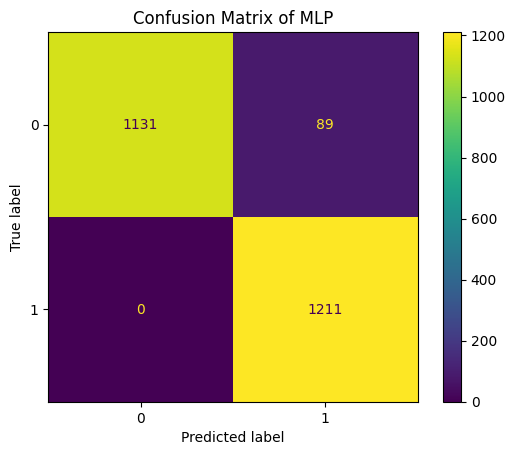

Accuracy of MLP:  0.9633895516248457
Precision of MLP:  0.9315384615384615
Recall of MLP: 1.0
Specificity of MLP:  0.9270491803278689


In [175]:
mlp_tst_ls,mlp_accr=mlp_cls.evaluate(x_test,y_test)

mlp_cls_cnfsn_mtrx=confusion_matrix(y_test,mlp_prd)
ConfusionMatrixDisplay.from_predictions(y_test,mlp_prd)
plt.title('Confusion Matrix of MLP')
plt.show()

mlp_acc=accuracy_score(y_test,mlp_prd)
mlp_prcsn=precision_score(y_test,mlp_prd)
mlp_rcl=recall_score(y_test,mlp_prd)
mlp_spc=mlp_cls_cnfsn_mtrx[0][0]/(mlp_cls_cnfsn_mtrx[0][0]+mlp_cls_cnfsn_mtrx[0][1])

print("Accuracy of MLP: ",mlp_acc)
print("Precision of MLP: ",mlp_prcsn)
print("Recall of MLP: {}".format(mlp_rcl))
print("Specificity of MLP: ",mlp_spc)

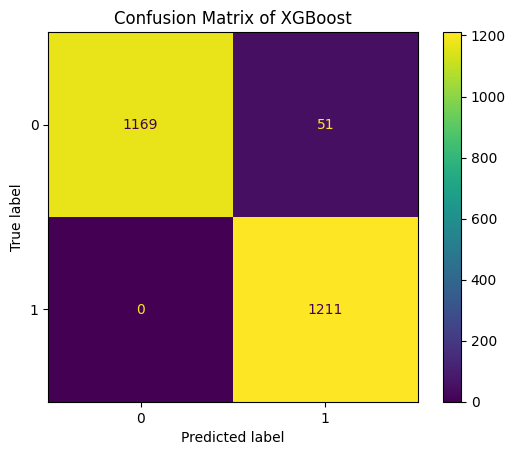

Accuracy of XGBoost:  0.9790209790209791
Precision of XGBoost:  0.9595879556259905
Recall of XGBoost: 1.0
Specificity of XGBoost:  0.9581967213114754


In [176]:
xgb_cls_cnfsn_mtrx=confusion_matrix(y_test,xgb_prd)
ConfusionMatrixDisplay.from_predictions(y_test,xgb_prd)
plt.title('Confusion Matrix of XGBoost')
plt.show()

xgb_acc=accuracy_score(y_test,xgb_prd)
xgb_prcsn=precision_score(y_test,xgb_prd)
xgb_rcl=recall_score(y_test,xgb_prd)
xgb_spc=xgb_cls_cnfsn_mtrx[0][0]/(xgb_cls_cnfsn_mtrx[0][0]+xgb_cls_cnfsn_mtrx[0][1])

print("Accuracy of XGBoost: ",xgb_acc)
print("Precision of XGBoost: ",xgb_prcsn)
print("Recall of XGBoost: {}".format(xgb_rcl))
print("Specificity of XGBoost: ",xgb_spc)

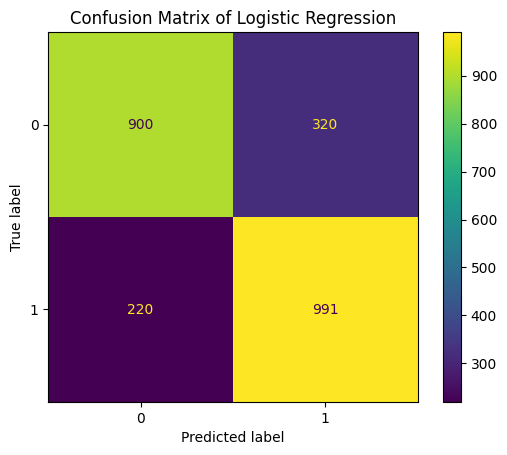

Accuracy of Logistic Regression:  0.7778691896338955
Precision of Logistic Regression:  0.7559115179252479
Recall of Logistic Regression:  0.8183319570602807
Specificity of Logistic Regression:  0.7377049180327869


In [177]:
logistic_regression_confusion_matrix=confusion_matrix(y_test,logistic_regression_prediction)
ConfusionMatrixDisplay.from_predictions(y_test,logistic_regression_prediction)
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

logistic_regression_accuracy=accuracy_score(y_test,logistic_regression_prediction)
logistic_regression_precision=precision_score(y_test,logistic_regression_prediction)
logistic_regression_recall=recall_score(y_test,logistic_regression_prediction)
logistic_regression_specificity=logistic_regression_confusion_matrix[0][0]/(logistic_regression_confusion_matrix[0][0]+logistic_regression_confusion_matrix[0][1])

print("Accuracy of Logistic Regression: ",logistic_regression_accuracy)
print("Precision of Logistic Regression: ",logistic_regression_precision)
print("Recall of Logistic Regression: ",logistic_regression_recall)
print("Specificity of Logistic Regression: ",logistic_regression_specificity)

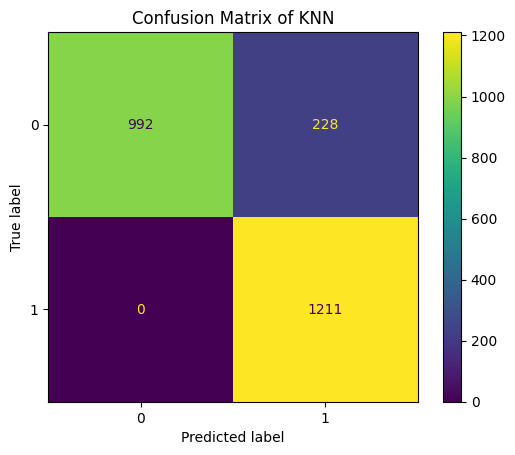

Accuracy of KNN:  0.9062114356232003
Precision of KNN:  0.8415566365531619
Recall of KNN:  1.0
Specificity of KNN:  0.8131147540983606


In [178]:
knn_confusion_matrix=confusion_matrix(y_test,knn_prediction)
ConfusionMatrixDisplay.from_predictions(y_test,knn_prediction)
plt.title('Confusion Matrix of KNN')
plt.show()

knn_accuracy=accuracy_score(y_test,knn_prediction)
knn_precision=precision_score(y_test,knn_prediction)
knn_recall=recall_score(y_test,knn_prediction)
knn_specificity=knn_confusion_matrix[0][0]/(knn_confusion_matrix[0][0]+knn_confusion_matrix[0][1])

print("Accuracy of KNN: ",knn_accuracy)
print("Precision of KNN: ",knn_precision)
print("Recall of KNN: ",knn_recall)
print("Specificity of KNN: ",knn_specificity)

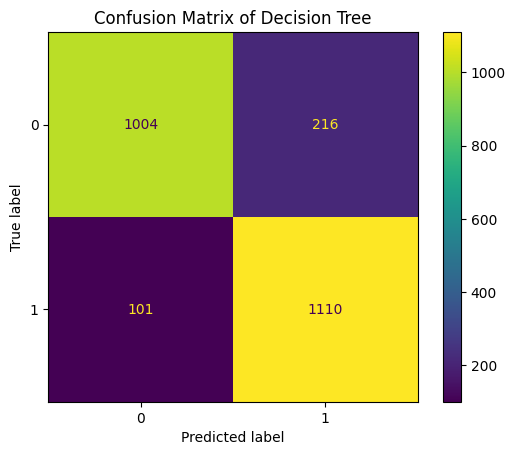

Accuracy of Decision Tree:  0.869600987248046
Precision of Decision Tree:  0.8371040723981901
Recall of Decision Tree:  0.916597853014038
Specificity of Decsion Tree:  0.8229508196721311


In [179]:
decision_tree_confusion_matrix=confusion_matrix(y_test,decision_tree_prediction)
ConfusionMatrixDisplay.from_predictions(y_test,decision_tree_prediction)
plt.title('Confusion Matrix of Decision Tree')
plt.show()

decision_tree_accuracy=accuracy_score(y_test,decision_tree_prediction)
decision_tree_precision=precision_score(y_test,decision_tree_prediction)
decision_tree_recall=recall_score(y_test,decision_tree_prediction)
decision_tree_specificity=decision_tree_confusion_matrix[0][0]/(decision_tree_confusion_matrix[0][0]+decision_tree_confusion_matrix[0][1])

print("Accuracy of Decision Tree: ",decision_tree_accuracy)
print("Precision of Decision Tree: ",decision_tree_precision)
print("Recall of Decision Tree: ",decision_tree_recall)
print("Specificity of Decsion Tree: ",decision_tree_specificity)

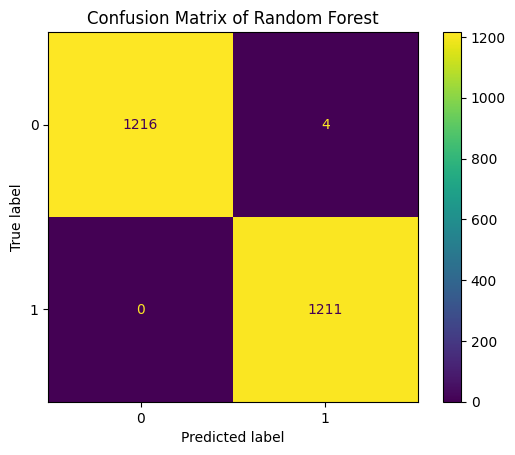

Accuracy of Random Forest:  0.9983545865898807
Precision of Random Forest:  0.9967078189300411
Recall of Random Forest:  1.0
Specificity of Random Forest:  0.9967213114754099


In [180]:
random_forest_confusion_matrix=confusion_matrix(y_test,random_forest_prediction)
ConfusionMatrixDisplay.from_predictions(y_test,random_forest_prediction)
plt.title('Confusion Matrix of Random Forest')
plt.show()

random_forest_accuracy=accuracy_score(y_test,random_forest_prediction)
random_forest_precision=precision_score(y_test,random_forest_prediction)
random_forest_recall=recall_score(y_test,random_forest_prediction)
random_forest_specificity=random_forest_confusion_matrix[0][0]/(random_forest_confusion_matrix[0][0]+random_forest_confusion_matrix[0][1])

print("Accuracy of Random Forest: ",random_forest_accuracy)
print("Precision of Random Forest: ",random_forest_precision)
print("Recall of Random Forest: ",random_forest_recall)
print("Specificity of Random Forest: ",random_forest_specificity)

In [194]:
xgb_perm=PermutationImportance(xgb_cls_bst).fit(x_test,y_test)
show_weights(xgb_perm,feature_names=X_over.columns.tolist())

Weight,Feature
0.3242 ± 0.0114,age
0.2753 ± 0.0148,avg_glucose_level
0.2371 ± 0.0108,bmi
0.0197 ± 0.0047,smoking_status_never smoked
0.0186 ± 0.0034,hypertension
0.0092 ± 0.0035,ever_married_Yes
0.0086 ± 0.0028,heart_disease
0.0049 ± 0.0034,work_type_Private
0.0047 ± 0.0021,gender_Male
0.0044 ± 0.0016,smoking_status_smokes


In [44]:
#prds = mlp_cls.predict(x_test)
#rnd_prds = np.round(prds)
#mlp_perm=PermutationImportance(mlp_cls, scoring='neg_log_loss').fit(x_test,y_test)
#show_weights(mlp_perm,feature_names=X_over.columns.tolist())

In [45]:
#decision_tree_perm=PermutationImportance(decision_tree_classifer).fit(x_test,y_test)
#show_weights(decision_tree_perm,feature_names=X_over.columns.tolist())

In [183]:
random_forest_perm=PermutationImportance(random_forest_classifier_best).fit(x_test,y_test)
show_weights(random_forest_perm,feature_names=X_over.columns.tolist())

Weight,Feature
0.3234 ± 0.0075,age
0.2644 ± 0.0106,avg_glucose_level
0.1871 ± 0.0053,bmi
0.0843 ± 0.0037,ever_married_Yes
0.0841 ± 0.0068,hypertension
0.0798 ± 0.0047,heart_disease
0.0666 ± 0.0048,smoking_status_never smoked
0.0578 ± 0.0046,gender_Male
0.0566 ± 0.0077,work_type_Private
0.0552 ± 0.0045,Residence_type_Urban


In [184]:
logistic_regression_perm=PermutationImportance(logistic_regression_classifer).fit(x_test,y_test)
show_weights(logistic_regression_perm,feature_names=X_over.columns.tolist())

Weight,Feature
0.2535 ± 0.0186,age
0.0109 ± 0.0073,avg_glucose_level
0.0052 ± 0.0058,work_type_children
0.0035 ± 0.0025,bmi
0.0026 ± 0.0019,Residence_type_Urban
0.0017 ± 0.0010,smoking_status_never smoked
0.0016 ± 0.0038,work_type_Private
0.0014 ± 0.0011,work_type_Self-employed
0.0012 ± 0.0028,gender_Male
0.0005 ± 0.0013,work_type_Never_worked


In [48]:
#knn_perm=PermutationImportance(knn_classifier).fit(x_test,y_test)
#show_weights(knn_perm,feature_names=X_over.columns.tolist())

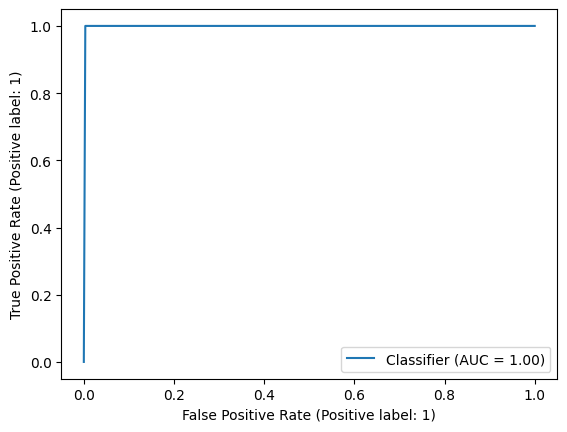

In [185]:
RocCurveDisplay.from_predictions(y_test,random_forest_prediction)

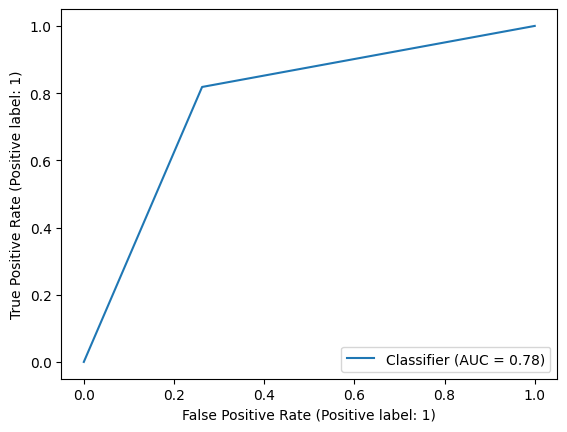

In [186]:
RocCurveDisplay.from_predictions(y_test,logistic_regression_prediction)

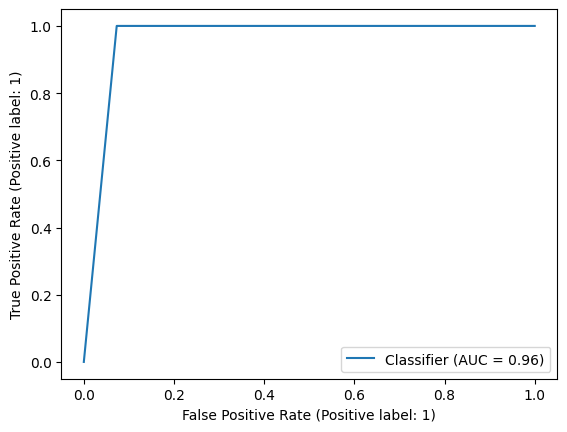

In [187]:
RocCurveDisplay.from_predictions(y_test,mlp_prd)

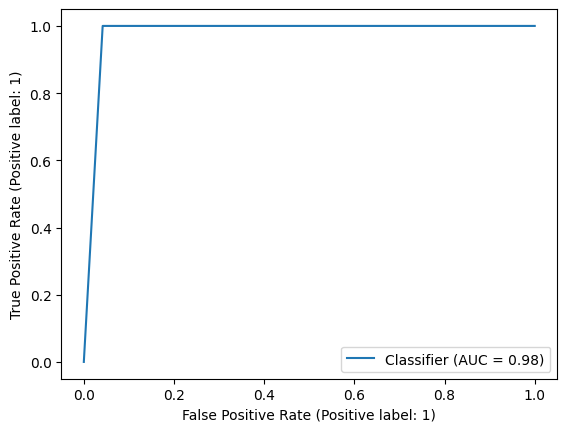

In [188]:
RocCurveDisplay.from_predictions(y_test,xgb_prd)

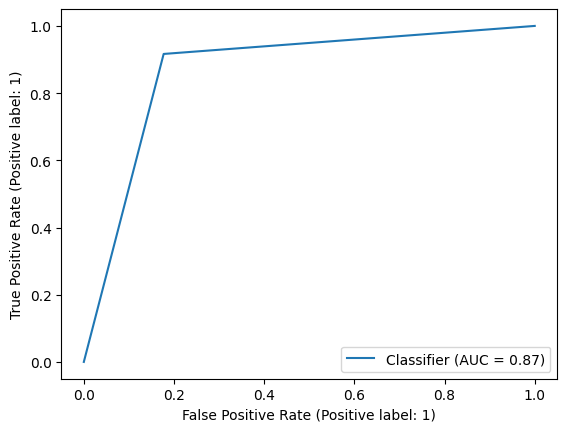

In [189]:
RocCurveDisplay.from_predictions(y_test,decision_tree_prediction)

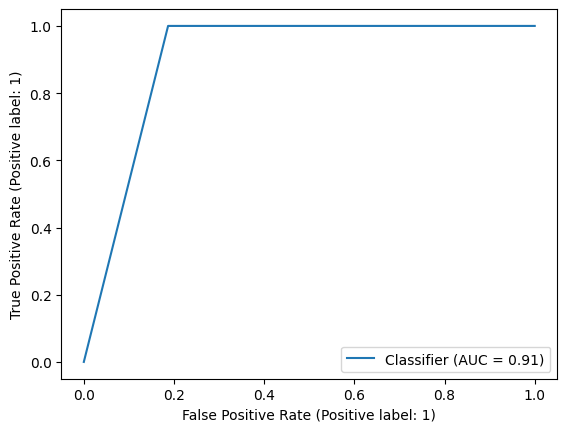

In [190]:
RocCurveDisplay.from_predictions(y_test,knn_prediction)

In [192]:
joblib.dump(random_forest_classifier_best, '/content/drive/MyDrive/random_forest_model.joblib')

['/content/drive/MyDrive/random_forest_model.joblib']

In [213]:
X2_over = X_over.drop(['hypertension'],axis=1)
X2_over.head()

,age,heart_disease,avg_glucose_level,bmi,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67,1,228,36,1,0,1,0,1,0,0,1,1,0,0
1,61,0,202,0,0,0,1,0,0,1,0,0,0,1,0
2,80,1,105,32,1,0,1,0,1,0,0,0,0,1,0
3,49,0,171,34,0,0,1,0,1,0,0,1,0,0,1
4,79,0,174,24,0,0,1,0,0,1,0,0,0,1,0


In [214]:
standard_scalar2=StandardScaler()
normalized_data2=standard_scalar2.fit_transform(X2_over)

In [215]:
x3_train,x3_test,y3_train,y3_test=train_test_split(normalized_data2,y_over,shuffle=True)

In [216]:
xgb_prm_grd2 = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200],
}

xgb_grd_srch2 = GridSearchCV(estimator=xgb_cls, param_grid=xgb_prm_grd2, scoring='neg_log_loss', cv=5)
xgb_grd_srch2.fit(x3_train, y3_train)

xgb_bst_prms2 = xgb_grd_srch2.best_params_
print("Best Hyperparameters:", xgb_bst_prms2)
xgb_cls_bst2=xgb_grd_srch2.best_estimator_

Best Hyperparameters: {'max_depth': 7, 'n_estimators': 200}


In [217]:
xgb_crs_val_scr2=cross_val_score(xgb_cls_bst2,x_train,y_train,scoring='accuracy')
xgb_crs_val_scr2

array([0.96504455, 0.97942387, 0.96844993, 0.97256516, 0.97530864])

In [218]:
xgb_prd2=xgb_cls_bst2.predict(x3_test)

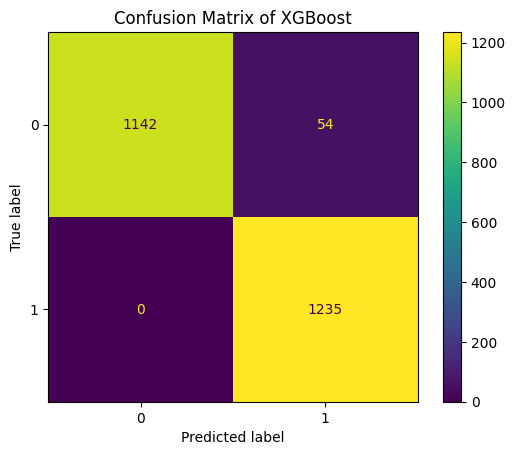

Accuracy of XGBoost:  0.9777869189633895
Precision of XGBoost:  0.9581070597362297
Recall of XGBoost: 1.0
Specificity of XGBoost:  0.9548494983277592


In [219]:
xgb_cls_cnfsn_mtrx2=confusion_matrix(y3_test,xgb_prd2)
ConfusionMatrixDisplay.from_predictions(y3_test,xgb_prd2)
plt.title('Confusion Matrix of XGBoost')
plt.show()

xgb_acc2=accuracy_score(y3_test,xgb_prd2)
xgb_prcsn2=precision_score(y3_test,xgb_prd2)
xgb_rcl2=recall_score(y3_test,xgb_prd2)
xgb_spc2=xgb_cls_cnfsn_mtrx2[0][0]/(xgb_cls_cnfsn_mtrx2[0][0]+xgb_cls_cnfsn_mtrx2[0][1])

print("Accuracy of XGBoost: ",xgb_acc2)
print("Precision of XGBoost: ",xgb_prcsn2)
print("Recall of XGBoost: {}".format(xgb_rcl2))
print("Specificity of XGBoost: ",xgb_spc2)

In [229]:
mlp_cls2=Sequential([
    Dense(units=512,activation='relu',input_dim=x3_train.shape[1]),
    Dropout(0.1),
    Dense(units=256,activation='relu'),
    Dropout(0.1),
    Dense(units=128,activation='relu'),
    Dropout(0.1),
    Dense(units=64,activation='relu'),
    Dropout(0.1),
    Dense(units=1,activation='sigmoid')
])

In [230]:
x4_train, x4_val, y4_train, y4_val = train_test_split(x3_train, y3_train, test_size=0.2, shuffle=True)
erl_stpg=EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [231]:
mlp_cls2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
mlp_cls2.fit(x4_train,y4_train,epochs=100,batch_size=256,validation_data=(x4_val,y4_val),callbacks=[erl_stpg])

Epoch 1/100
23/23 [==============================] - 3s 37ms/step - loss: 0.5261 - accuracy: 0.7416 - val_loss: 0.4626 - val_accuracy: 0.7923
Epoch 2/100
23/23 [==============================] - 0s 20ms/step - loss: 0.4452 - accuracy: 0.7886 - val_loss: 0.4315 - val_accuracy: 0.8033
Epoch 3/100
23/23 [==============================] - 0s 19ms/step - loss: 0.4211 - accuracy: 0.8002 - val_loss: 0.4095 - val_accuracy: 0.8163
Epoch 4/100
23/23 [==============================] - 0s 20ms/step - loss: 0.3913 - accuracy: 0.8230 - val_loss: 0.3843 - val_accuracy: 0.8334
Epoch 5/100
23/23 [==============================] - 0s 17ms/step - loss: 0.3757 - accuracy: 0.8285 - val_loss: 0.3807 - val_accuracy: 0.8245
Epoch 6/100
23/23 [==============================] - 0s 19ms/step - loss: 0.3507 - accuracy: 0.8426 - val_loss: 0.3431 - val_accuracy: 0.8465
Epoch 7/100
23/23 [==============================] - 0s 19ms/step - loss: 0.3286 - accuracy: 0.8560 - val_loss: 0.3353 - val_accuracy: 0.8561
Epoch 

76/76 [==============================] - 0s 4ms/step - loss: 0.1261 - accuracy: 0.9667


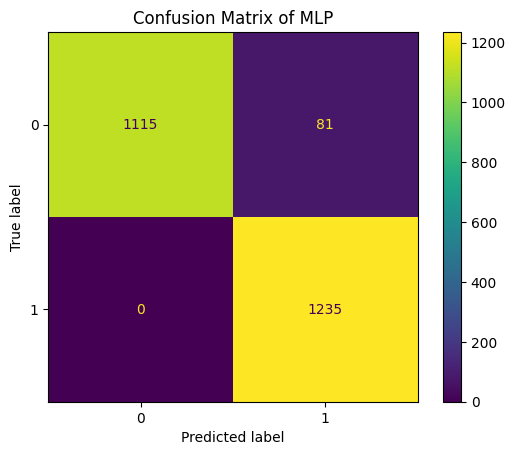

Accuracy of MLP:  0.9666803784450844
Precision of MLP:  0.9384498480243161
Recall of MLP: 1.0
Specificity of MLP:  0.9322742474916388


In [233]:
mlp_prd2=mlp_cls2.predict(x3_test).round()
mlp_tst_ls2,mlp_accr2=mlp_cls2.evaluate(x3_test,y3_test)

mlp_cls_cnfsn_mtrx2=confusion_matrix(y3_test,mlp_prd2)
ConfusionMatrixDisplay.from_predictions(y3_test,mlp_prd2)
plt.title('Confusion Matrix of MLP')
plt.show()

mlp_acc2=accuracy_score(y3_test,mlp_prd2)
mlp_prcsn2=precision_score(y3_test,mlp_prd2)
mlp_rcl2=recall_score(y3_test,mlp_prd2)
mlp_spc2=mlp_cls_cnfsn_mtrx2[0][0]/(mlp_cls_cnfsn_mtrx2[0][0]+mlp_cls_cnfsn_mtrx2[0][1])

print("Accuracy of MLP: ",mlp_acc2)
print("Precision of MLP: ",mlp_prcsn2)
print("Recall of MLP: {}".format(mlp_rcl2))
print("Specificity of MLP: ",mlp_spc2)